In [1]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
num_sets = 5
embeddings_per_set = 10
embedding_dim = 192

# Create a base set of embeddings
base_set = torch.randn(embeddings_per_set, embedding_dim)

# Create highly correlated sets by adding small noise
set0 = base_set + torch.randn(embeddings_per_set, embedding_dim) * 0.3
set1 = base_set + torch.randn(embeddings_per_set, embedding_dim) * 0.5
set2 = base_set + torch.randn(embeddings_per_set, embedding_dim) * 0.7

# Create low correlated sets with more noise/randomness
set3 = torch.randn(embeddings_per_set, embedding_dim)
set4 = torch.randn(embeddings_per_set, embedding_dim)

sets = [set0, set1, set2, set3, set4]

In [3]:
def calculate_set_correlation(set_a, set_b):
    """
    Calculates the correlation between two sets of embeddings.
    This is done by taking the mean of each set and then computing the cosine
    similarity of the mean vectors.
    """
    mean_a = torch.mean(set_a, dim=0)
    mean_b = torch.mean(set_b, dim=0)

    # Cosine similarity
    cos_sim = torch.nn.functional.cosine_similarity(mean_a, mean_b, dim=0)
    return cos_sim.item()

def calculate_set_correlation_avg_similarity(set_a, set_b):
    """
    Calculates the correlation between two sets of embeddings by
    first computing the pairwise cosine similarity for all sample pairs
    and then averaging the results.
    """
    # Normalize each embedding vector to unit length
    set_a_norm = F.normalize(set_a, p=2, dim=1)
    set_b_norm = F.normalize(set_b, p=2, dim=1)

    # Calculate the cosine similarity matrix between all pairs of samples
    # The result is a matrix of size (embeddings_per_set x embeddings_per_set)
    similarity_matrix = torch.mm(set_a_norm, set_b_norm.T)
    # similarity_matrix = torch.mm(set_a, set_b.T)

    # Average all the similarity scores
    return similarity_matrix.mean().item()

Correlation Matrix:
[[ 1.          0.86973506  0.82331628 -0.07585467 -0.06762406]
 [ 0.86973506  1.          0.76122659 -0.01690013 -0.05949724]
 [ 0.82331628  0.76122659  1.         -0.06357253 -0.0206522 ]
 [-0.07585467 -0.01690013 -0.06357253  1.00000012 -0.08197837]
 [-0.06762406 -0.05949724 -0.0206522  -0.08197837  1.        ]]


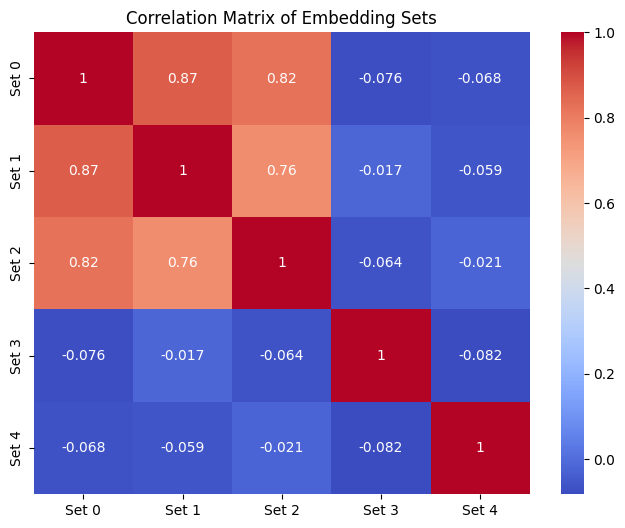

In [4]:
correlation_matrix = np.zeros((num_sets, num_sets))

for i in range(num_sets):
    for j in range(num_sets):
        correlation_matrix[i, j] = calculate_set_correlation(sets[i], sets[j])

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    xticklabels=[f'Set {i}' for i in range(num_sets)],
    yticklabels=[f'Set {i}' for i in range(num_sets)]
)
plt.title('Correlation Matrix of Embedding Sets')
# plt.savefig('correlation_matrix.png')

print("Correlation Matrix:")
print(correlation_matrix)

New Correlation Matrix (Averaging Sample Similarities):
[[ 0.1075038   0.09508621  0.08671062 -0.00768467 -0.00779946]
 [ 0.09508621  0.11092966  0.08155868 -0.00158758 -0.00666734]
 [ 0.08671062  0.08155868  0.10433354 -0.00645798 -0.00265662]
 [-0.00768467 -0.00158758 -0.00645799  0.10676037 -0.00806708]
 [-0.00779946 -0.00666734 -0.00265662 -0.00806708  0.09824298]]


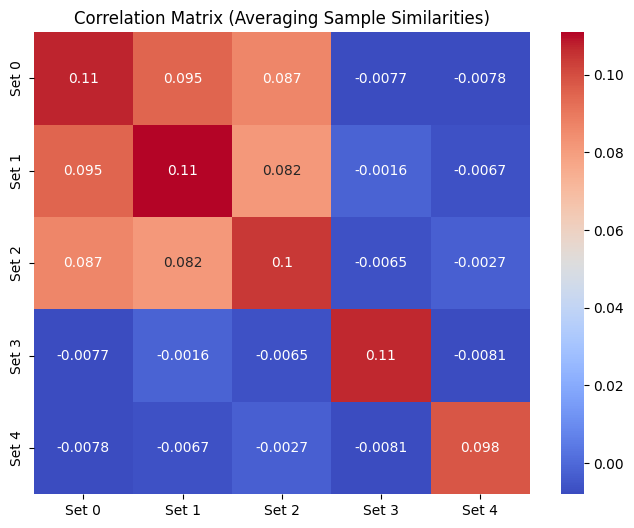

In [5]:
correlation_matrix_avg = np.zeros((num_sets, num_sets))

for i in range(num_sets):
    for j in range(num_sets):
        correlation_matrix_avg[i, j] = calculate_set_correlation_avg_similarity(sets[i], sets[j])

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix_avg,
    annot=True,
    cmap='coolwarm',
    xticklabels=[f'Set {i}' for i in range(num_sets)],
    yticklabels=[f'Set {i}' for i in range(num_sets)]
)
plt.title('Correlation Matrix (Averaging Sample Similarities)')
# plt.savefig('correlation_matrix_avg_similarity.png')

print("New Correlation Matrix (Averaging Sample Similarities):")
print(correlation_matrix_avg)

torch.Size([20, 192])


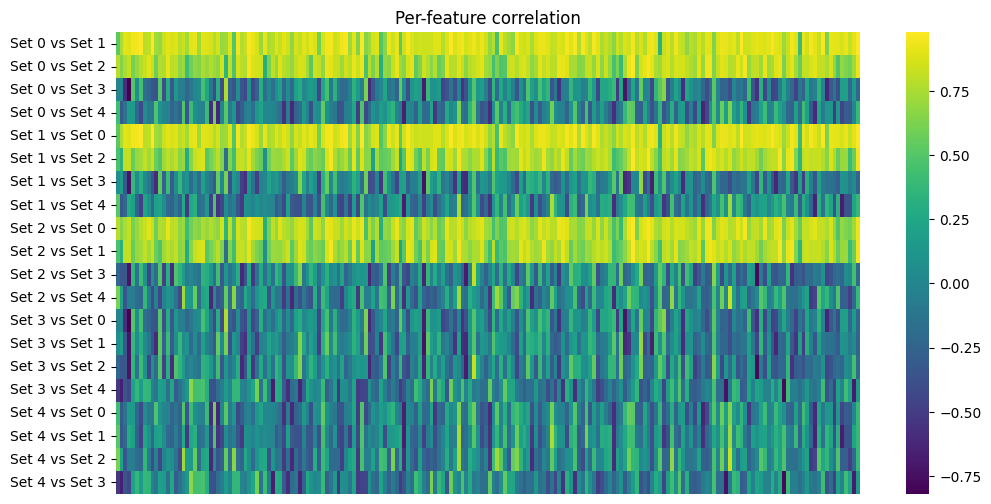

In [9]:
# # Example sets: 10 vectors of 192 dims
# set_a = torch.randn(10, 192)
# set_b = torch.randn(10, 192)

# # Make set_c highly correlated with set_a
# noise = 0.9 * torch.randn(10, 192)
# set_c = set_a + noise  # small noise preserves high correlation

# Feature-wise correlation function
def feature_correlations(set_x, set_y):
    x = (set_x - set_x.mean(0)) / set_x.std(0, unbiased=False)
    y = (set_y - set_y.mean(0)) / set_y.std(0, unbiased=False)
    return (x * y).mean(0)  # [192]

# Compute correlations
# corr_a_b = feature_correlations(set_a, set_b)
# corr_a_c = feature_correlations(set_a, set_c)

# correlation_matrix_feature = np.zeros((num_sets, num_sets))
correlation_matrix_feature = []
y_labels = []
for i in range(num_sets):
    for j in range(num_sets):
        # correlation_matrix_feature[i, j] = feature_correlations(sets[i], sets[j])
        if i == j:
            continue  # Skip self-correlation
        correlation_matrix_feature.append(feature_correlations(sets[i], sets[j]))
        y_labels.append(f'Set {i} vs Set {j}')

# Combine for heatmap
# corr_matrix = torch.stack([corr_a_b, corr_a_c], dim=0)  # [2, 192]
corr_matrix = torch.stack(correlation_matrix_feature, dim=0)  # [2, 192]
print(corr_matrix.shape)

# Visualize
plt.figure(figsize=(12, 6))
# sns.heatmap(correlation_matrix_feature, cmap="viridis", cbar=True, xticklabels=False, yticklabels=["A vs B", "A vs C"])
sns.heatmap(correlation_matrix_feature, cmap="viridis", cbar=True, xticklabels=False, yticklabels=y_labels)
plt.title("Per-feature correlation")
plt.show()
